In [1]:
import pandas as pd

In [2]:
#Load dataset
data = pd.read_csv('shopping.csv')

In [3]:
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [4]:
data.shape

(3900, 18)

In [5]:
data.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [6]:
data.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [7]:
data.nunique()

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64

In [8]:
# prompt: data.keys

data.keys()
item_counts = data['Item Purchased'].value_counts()
print(item_counts)

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64


In [9]:
data.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
df = pd.DataFrame(data)
grouped_by_item = df.groupby('Item Purchased')
total_purchase_per_item = grouped_by_item['Purchase Amount (USD)'].sum()
print(total_purchase_per_item)

Item Purchased
Backpack       8636
Belt           9635
Blouse        10410
Boots          9018
Coat           9275
Dress         10320
Gloves         8477
Handbag        8857
Hat            9375
Hoodie         8767
Jacket         9249
Jeans          7548
Jewelry       10010
Pants         10090
Sandals        9200
Scarf          9561
Shirt         10332
Shoes          9240
Shorts         9433
Skirt          9402
Sneakers       8635
Socks          9252
Sunglasses     9649
Sweater        9462
T-shirt        9248
Name: Purchase Amount (USD), dtype: int64


In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

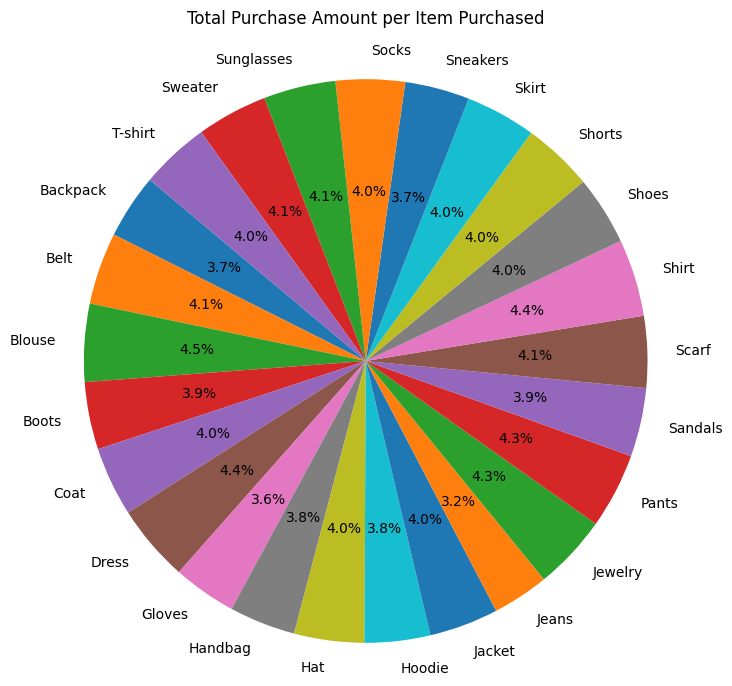

In [13]:
# Create a pie chart of the total purchase amount per item
plt.figure(figsize=(8, 8))
plt.pie(total_purchase_per_item, labels=total_purchase_per_item.index, autopct="%1.1f%%", startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Total Purchase Amount per Item Purchased\n')
plt.show()

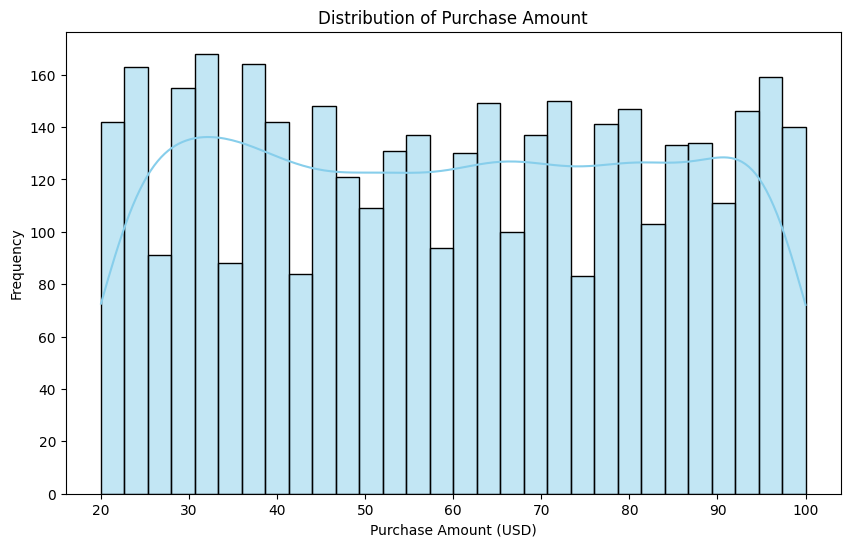

In [14]:
# Distribution of Purchase Amount
plt.figure(figsize=(10, 6))
sns.histplot(data['Purchase Amount (USD)'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Purchase Amount')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.show()

C:\Users\uttam\AppData\Local\Temp\ipykernel_25220\3389739735.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Frequency of Purchases', data=data, palette='pastel')


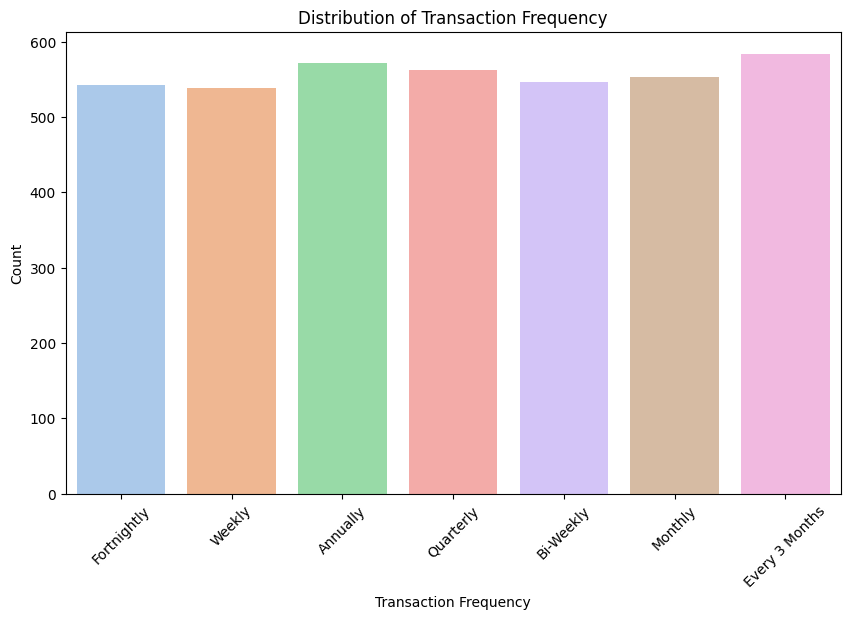

In [15]:
# Distribution of transaction frequency
plt.figure(figsize=(10, 6))
sns.countplot(x='Frequency of Purchases', data=data, palette='pastel')
plt.title('Distribution of Transaction Frequency')
plt.xlabel('Transaction Frequency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

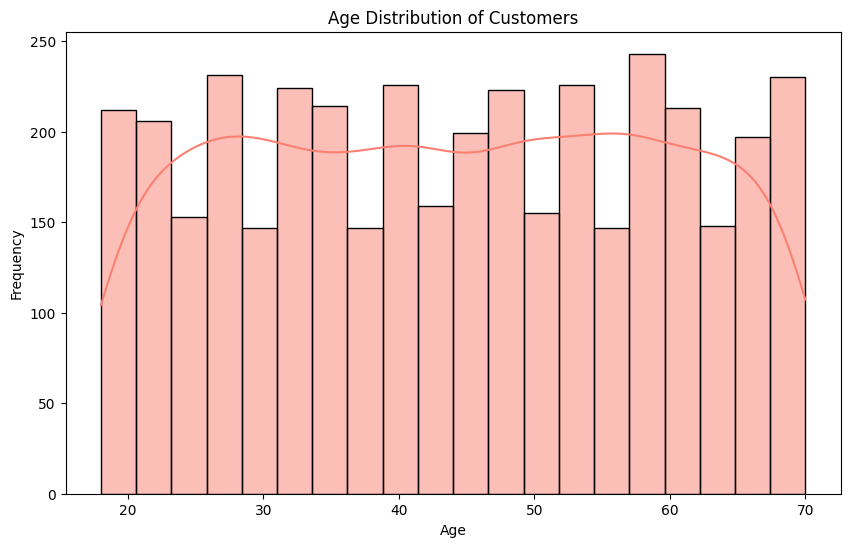

In [16]:
# Customer demographics - Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True, color='salmon')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

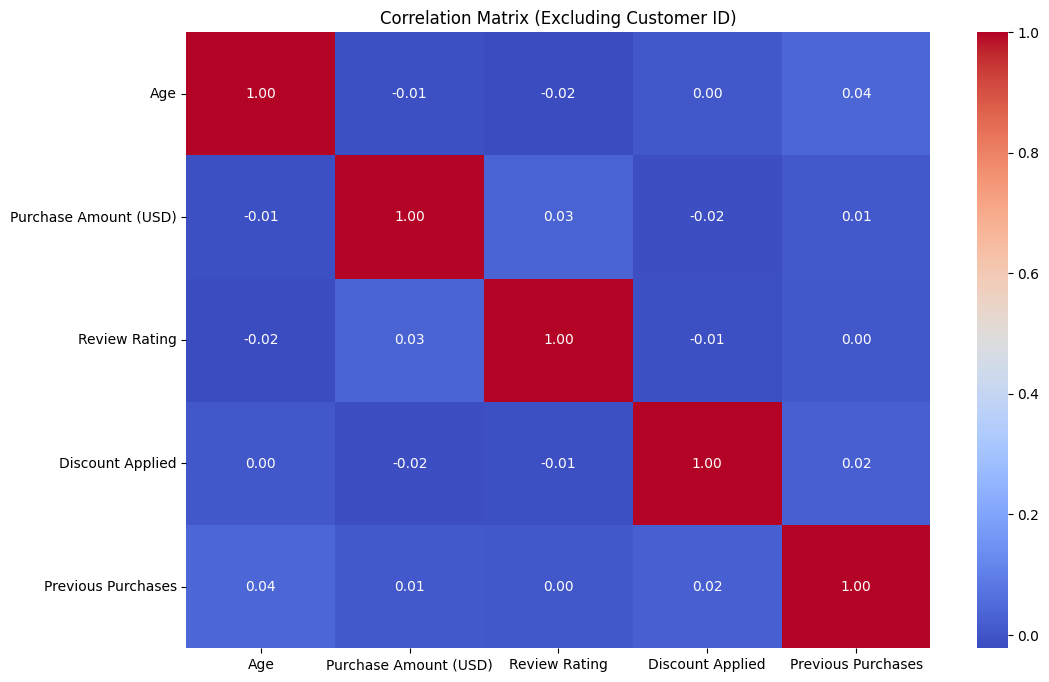

In [45]:
# Exclude 'Customer ID' from the selected numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop('Customer ID')

# Compute correlation matrix for numerical columns (excluding 'Customer ID')
correlation_matrix = data[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Excluding Customer ID)')
plt.show()


In [18]:
summary_statistics = data.describe()
print("Summary Statistics:\n", summary_statistics)

Summary Statistics:
        Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


In [19]:
product_sales = data.groupby('Item Purchased')['Purchase Amount (USD)'].sum().sort_values(ascending=False)


In [20]:
top_selling_products = product_sales.head(10)
print("Top Selling Products:\n", top_selling_products)



Top Selling Products:
 Item Purchased
Blouse        10410
Shirt         10332
Dress         10320
Pants         10090
Jewelry       10010
Sunglasses     9649
Belt           9635
Scarf          9561
Sweater        9462
Shorts         9433
Name: Purchase Amount (USD), dtype: int64


In [21]:
top_selling_categories = data[data['Item Purchased'].isin(top_selling_products.index)]['Category'].unique()
print("Categories of Top Selling Products:", top_selling_categories)

Categories of Top Selling Products: ['Clothing' 'Accessories']


In [22]:
category_sales = data.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

In [23]:
top_selling_categories = category_sales.head(5)
print("Top Selling Categories:\n", top_selling_categories)


Top Selling Categories:
 Category
Clothing       104264
Accessories     74200
Footwear        36093
Outerwear       18524
Name: Purchase Amount (USD), dtype: int64


C:\Users\uttam\AppData\Local\Temp\ipykernel_25220\1635482662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_selling_categories.index, y=top_selling_categories.values, palette='pastel')


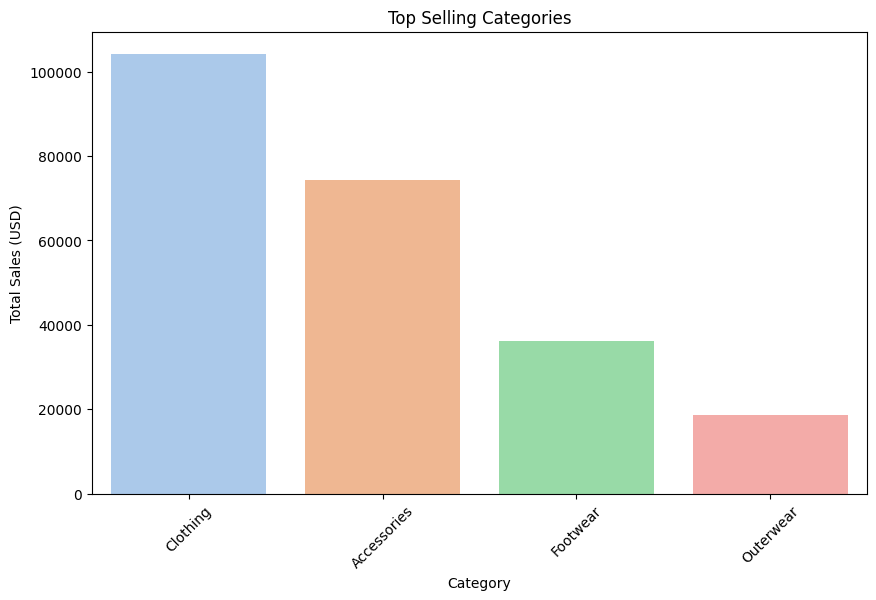

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling_categories.index, y=top_selling_categories.values, palette='pastel')
plt.title('Top Selling Categories')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()

C:\Users\uttam\AppData\Local\Temp\ipykernel_25220\3421284225.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


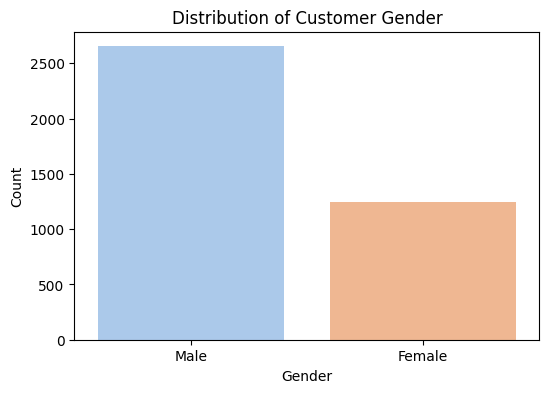

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Distribution of Customer Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\uttam\AppData\Local\Temp\ipykernel_25220\1953023192.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Payment Method', data=data, palette='pastel')


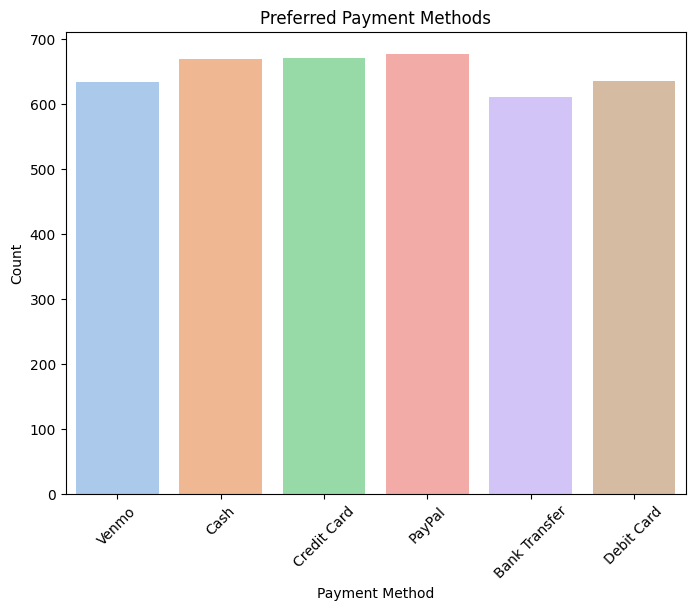

In [26]:
# Preferred payment methods
plt.figure(figsize=(8, 6))
sns.countplot(x='Payment Method', data=data, palette='pastel')
plt.title('Preferred Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [27]:
average_age = data['Age'].mean()
most_common_payment_method = data['Payment Method'].mode()[0]

In [28]:
print("Average Age of Customers:", average_age)
print("Most Common Payment Method:", most_common_payment_method)

Average Age of Customers: 44.06846153846154
Most Common Payment Method: PayPal


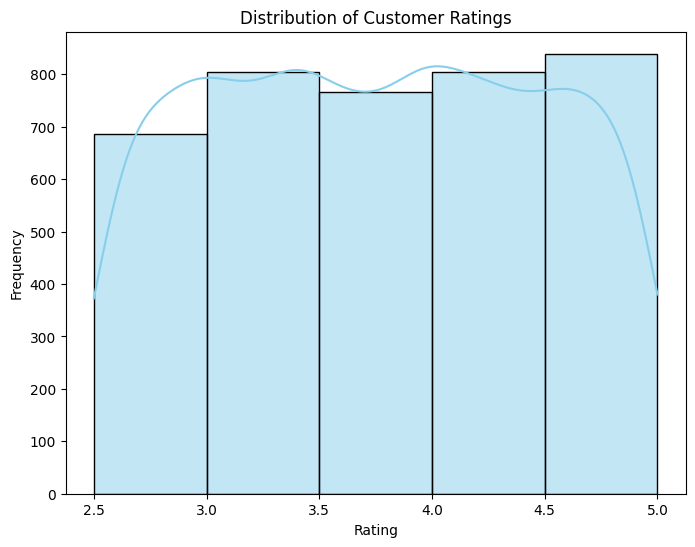

In [29]:
# Explore Ratings Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['Review Rating'], bins=5, kde=True, color='skyblue')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

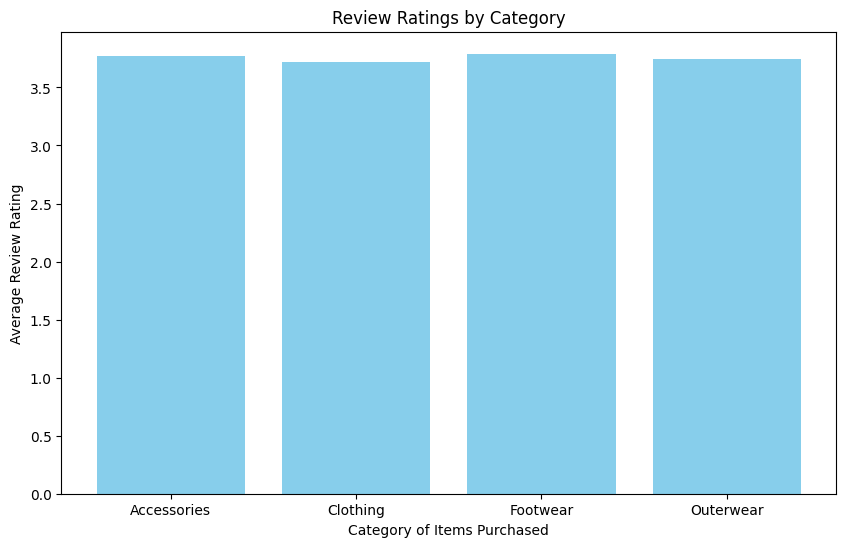

In [13]:

avg_ratings = data.groupby('Category')['Review Rating'].mean().reset_index()


#visualizing the review ratings per category

plt.figure(figsize=(10, 6))
plt.bar(avg_ratings['Category'], avg_ratings['Review Rating'], color='skyblue')
plt.xlabel('Category of Items Purchased')
plt.ylabel('Average Review Rating')
plt.title('Review Ratings by Category')
plt.show()


C:\Users\uttam\AppData\Local\Temp\ipykernel_23564\2520965050.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Purchased', y='Review Rating', data=avg_ratings, palette='viridis')


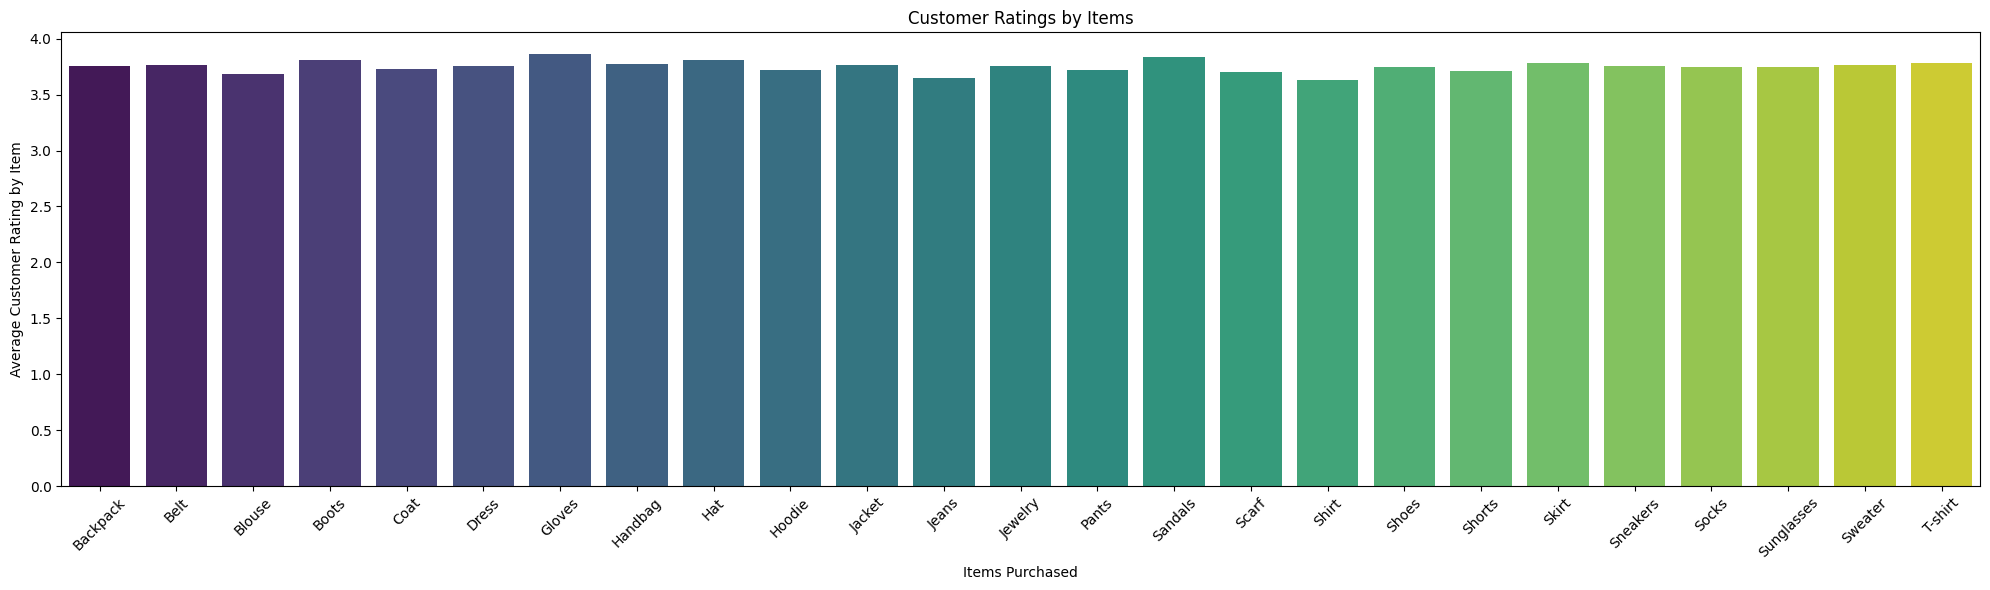

In [15]:

avg_ratings = data.groupby('Item Purchased')['Review Rating'].mean().reset_index()


#visualizing the review ratings per Item

plt.figure(figsize=(20, 6))
sns.barplot(x='Item Purchased', y='Review Rating', data=avg_ratings, palette='viridis')
plt.xlabel('Items Purchased')
plt.ylabel('Average Customer Rating by Item')
plt.title('Customer Ratings by Items')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


C:\Users\uttam\AppData\Local\Temp\ipykernel_23564\3097350475.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Purchased', y='Review Rating', data=lowest_rated_items, palette='viridis')


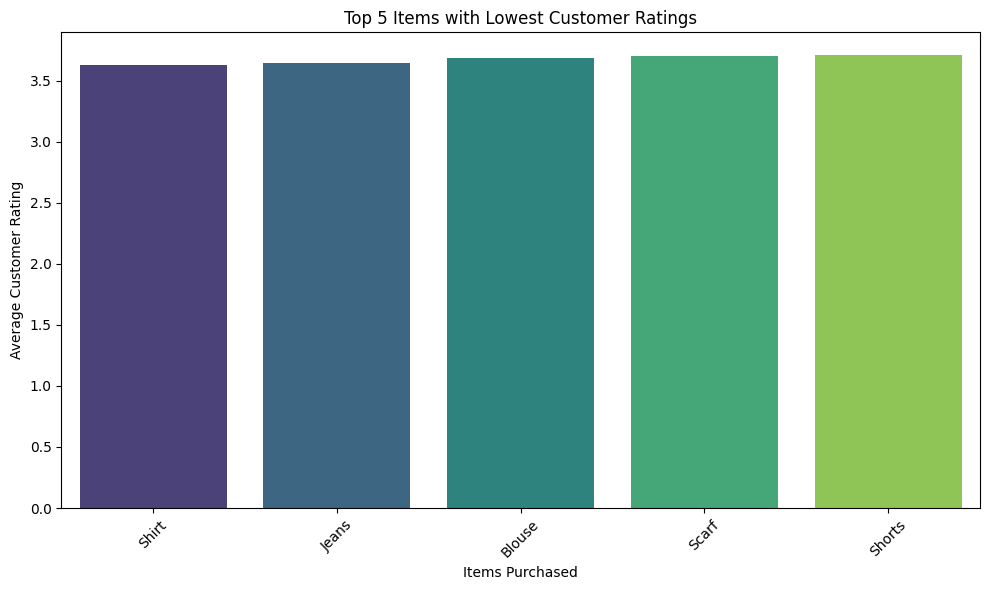

Top 5 items with the lowest average ratings:
   Item Purchased  Review Rating
16          Shirt       3.629586
11          Jeans       3.648387
2          Blouse       3.683626
15          Scarf       3.700000
18         Shorts       3.711465


In [18]:
# Get the 5 items with the lowest ratings
sorted_ratings = avg_ratings.sort_values(by='Review Rating', ascending=True)
lowest_rated_items = sorted_ratings.head(5)

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Purchased', y='Review Rating', data=lowest_rated_items, palette='viridis')
plt.xlabel('Items Purchased')
plt.ylabel('Average Customer Rating')
plt.title('Top 5 Items with Lowest Customer Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the 5 items with the lowest ratings
print("Top 5 items with the lowest average ratings:")
print(lowest_rated_items)

C:\Users\uttam\AppData\Local\Temp\ipykernel_23564\2815505140.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Purchased', y='Review Rating', data=highest_rated_items, palette='viridis')


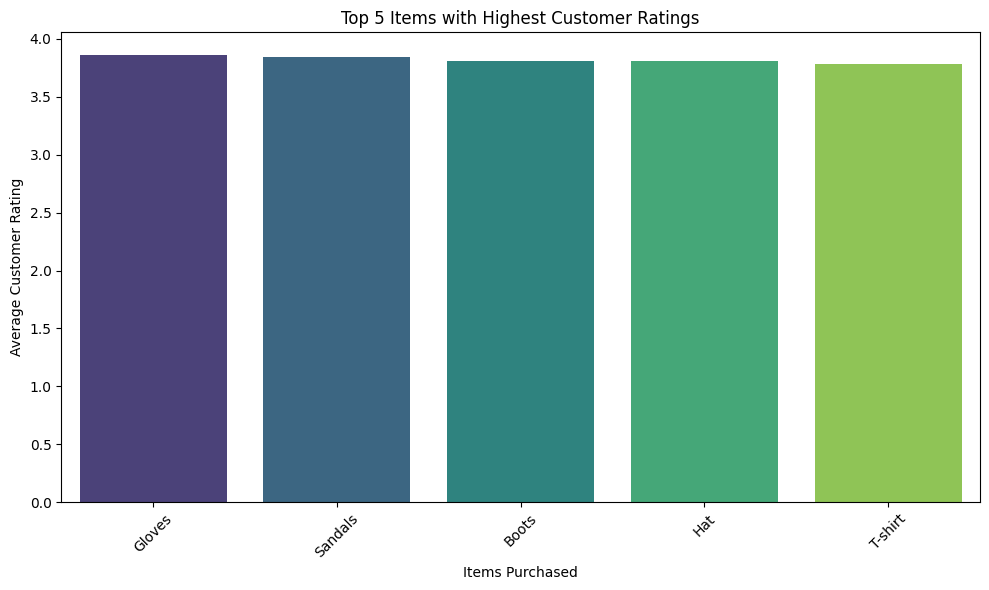

Top 5 items with the lowest average ratings:
   Item Purchased  Review Rating
6          Gloves       3.864286
14        Sandals       3.841250
3           Boots       3.812500
8             Hat       3.806494
24        T-shirt       3.782993


In [19]:
# Get the 5 items with the best ratings
sorted_ratings = avg_ratings.sort_values(by='Review Rating', ascending=False)
highest_rated_items = sorted_ratings.head(5)

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Purchased', y='Review Rating', data=highest_rated_items, palette='viridis')
plt.xlabel('Items Purchased')
plt.ylabel('Average Customer Rating')
plt.title('Top 5 Items with Highest Customer Ratings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the 5 items with the lowest ratings
print("Top 5 items with the lowest average ratings:")
print(highest_rated_items)

In [30]:
# 3. Analyze ratings by product
average_rating_by_product = data.groupby('Item Purchased')['Review Rating'].mean().sort_values(ascending=False)
print("Average Rating by Product:")
print(average_rating_by_product)


Average Rating by Product:
Item Purchased
Gloves        3.864286
Sandals       3.841250
Boots         3.812500
Hat           3.806494
T-shirt       3.782993
Skirt         3.782278
Handbag       3.775163
Sweater       3.767073
Jacket        3.763190
Belt          3.761491
Sneakers      3.757931
Jewelry       3.756140
Dress         3.754819
Backpack      3.752448
Socks         3.750943
Shoes         3.747333
Sunglasses    3.744720
Coat          3.730435
Hoodie        3.719205
Pants         3.718713
Shorts        3.711465
Scarf         3.700000
Blouse        3.683626
Jeans         3.648387
Shirt         3.629586
Name: Review Rating, dtype: float64


C:\Users\uttam\AppData\Local\Temp\ipykernel_25220\4240812240.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Review Rating', data=data, palette='pastel')


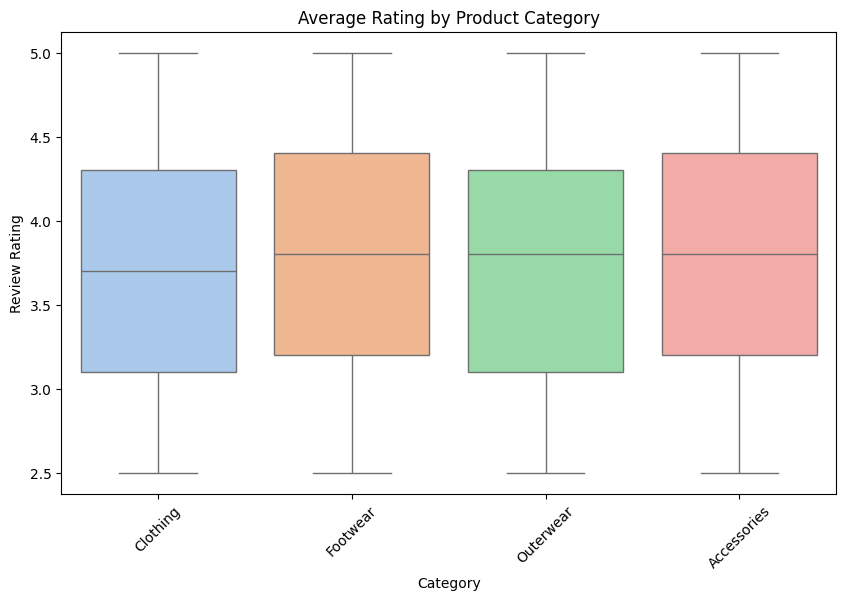

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Review Rating', data=data, palette='pastel')
plt.title('Average Rating by Product Category')
plt.xlabel('Category')
plt.ylabel('Review Rating')
plt.xticks(rotation=45)
plt.show()



In [20]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
features_for_customer_satisfaction = [
    'Review Rating',
    'Purchase Amount (USD)',
    'Discount Applied',
    'Previous Purchases',
    'Shipping Type',
    'Category'
]

satisfaction_data = data[features_for_customer_satisfaction]
satisfaction_data.head()

,Review Rating,Purchase Amount (USD),Discount Applied,Previous Purchases,Shipping Type,Category
0,3.1,53,Yes,14,Express,Clothing
1,3.1,64,Yes,2,Express,Clothing
2,3.1,73,Yes,23,Free Shipping,Clothing
3,3.5,90,Yes,49,Next Day Air,Footwear
4,2.7,49,Yes,31,Free Shipping,Clothing


In [21]:
#Encoding the Shipping Type and Category
label_encoder = LabelEncoder()
satisfaction_data['Discount Applied'] = label_encoder.fit_transform(satisfaction_data['Discount Applied'])
satisfaction_data['Shipping Type'] = label_encoder.fit_transform(satisfaction_data['Shipping Type'])
satisfaction_data['Category'] = label_encoder.fit_transform(satisfaction_data['Category'])

C:\Users\uttam\AppData\Local\Temp\ipykernel_23564\190112462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisfaction_data['Discount Applied'] = label_encoder.fit_transform(satisfaction_data['Discount Applied'])
C:\Users\uttam\AppData\Local\Temp\ipykernel_23564\190112462.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisfaction_data['Shipping Type'] = label_encoder.fit_transform(satisfaction_data['Shipping Type'])
C:\Users\uttam\AppData\Local\Temp\ipykernel_23564\190112462.py:5: SettingWithCop

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
satisfaction_data['Cluster'] = kmeans.fit_predict(satisfaction_data)

# Mapping cluster names to integers
cluster_names = {
    0: 'Good',
    1: 'Bad',
    2: 'Average',
    3: 'Excellent'
}
satisfaction_data['Cluster Name'] = satisfaction_data['Cluster'].map(cluster_names)

C:\Users\uttam\AppData\Local\Temp\ipykernel_23564\2096043336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisfaction_data['Cluster'] = kmeans.fit_predict(satisfaction_data)
C:\Users\uttam\AppData\Local\Temp\ipykernel_23564\2096043336.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  satisfaction_data['Cluster Name'] = satisfaction_data['Cluster'].map(cluster_names)


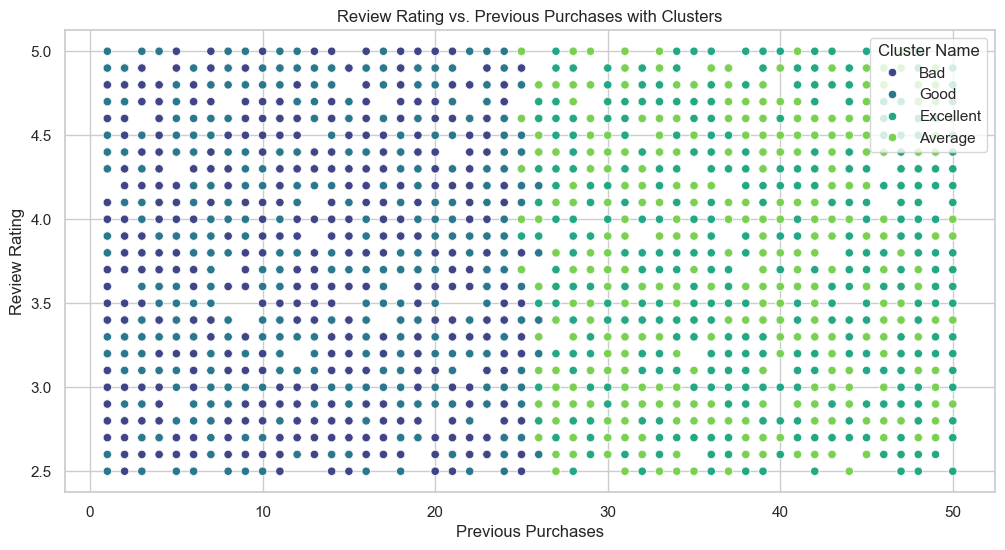

ValueError: Could not interpret value `Purchase Amount` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Visualize 'Review Rating' vs. 'Previous Purchases' with clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=satisfaction_data, x='Previous Purchases', y='Review Rating', hue='Cluster Name', palette='viridis', legend='full')
plt.title("Review Rating vs. Previous Purchases with Clusters")
plt.xlabel("Previous Purchases")
plt.ylabel("Review Rating")
plt.show()

# Visualize 'Review Rating' vs. 'Purchase Amount' with clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=satisfaction_data, x='Purchase Amount', y='Review Rating', hue='Cluster Name', palette='viridis', legend='full')
plt.title("Review Rating vs. Purchase Amount with Clusters")
plt.xlabel("Purchase Amount")
plt.ylabel("Review Rating")
plt.show()

# Analyzing clusters
# calculating average 'Review Rating' for each cluster
average_ratings = satisfaction_data.groupby('Cluster Name')['Review Rating'].mean()
print("\nAverage Review Ratings by Cluster:")
print(average_ratings)

In [32]:
# Convert "Discount Applied" column to binary values (1 for Yes, 0 for No)
data['Discount Applied'] = data['Discount Applied'].map({'Yes': 1, 'No': 0})

# 2. Identify Transactions with Discounts or Promotions
discount_transactions = data[data['Discount Applied'] == 1]

# 3. Analyze Sales Performance during Promotional Periods
# Calculate sales revenue during promotional periods
promotional_revenue = discount_transactions['Purchase Amount (USD)'].sum()

# Calculate sales revenue during non-promotional periods
non_promotional_revenue = data[data['Discount Applied'] == 0]['Purchase Amount (USD)'].sum()


C:\Users\uttam\AppData\Local\Temp\ipykernel_25220\1364379412.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Promotional', 'Non-Promotional'], y=[promotional_revenue, non_promotional_revenue], palette='pastel')


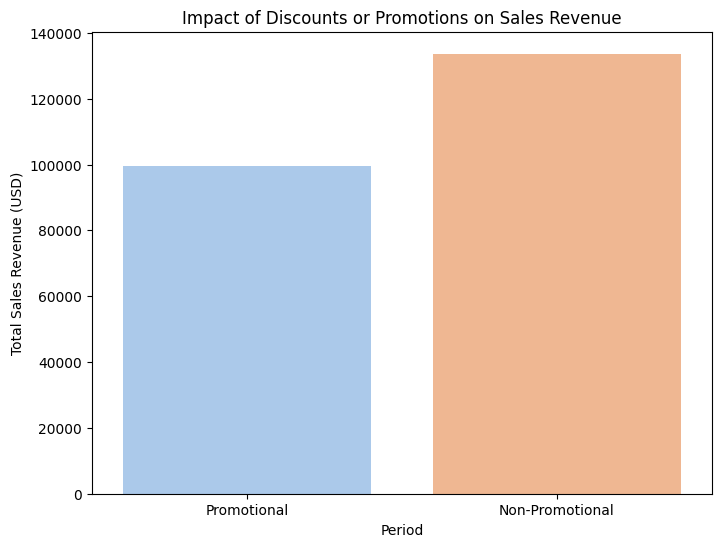

In [33]:
# 4. Visualize the Impact of Discounts or Promotions
plt.figure(figsize=(8, 6))
sns.barplot(x=['Promotional', 'Non-Promotional'], y=[promotional_revenue, non_promotional_revenue], palette='pastel')
plt.title('Impact of Discounts or Promotions on Sales Revenue')
plt.xlabel('Period')
plt.ylabel('Total Sales Revenue (USD)')
plt.show()

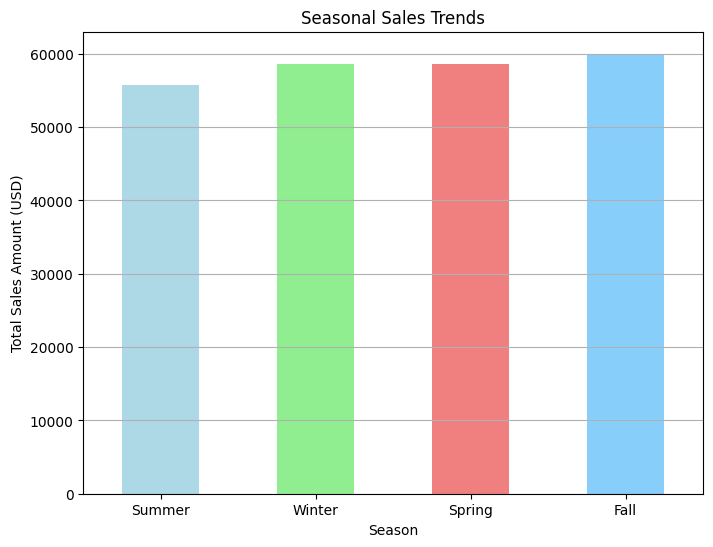

In [34]:
seasonal_sales = data.groupby('Season')['Purchase Amount (USD)'].sum()

# 4. Visualize Seasonal Trends in bar chart with different colors in ascending order
plt.figure(figsize=(8, 6))
seasonal_sales.sort_values().plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Seasonal Sales Trends')
plt.xlabel('Season')
plt.ylabel('Total Sales Amount (USD)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()



In [35]:
## Dataset 2

In [36]:
#load dataset 2
df = pd.read_csv('shopping_2.csv')

In [37]:
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [39]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


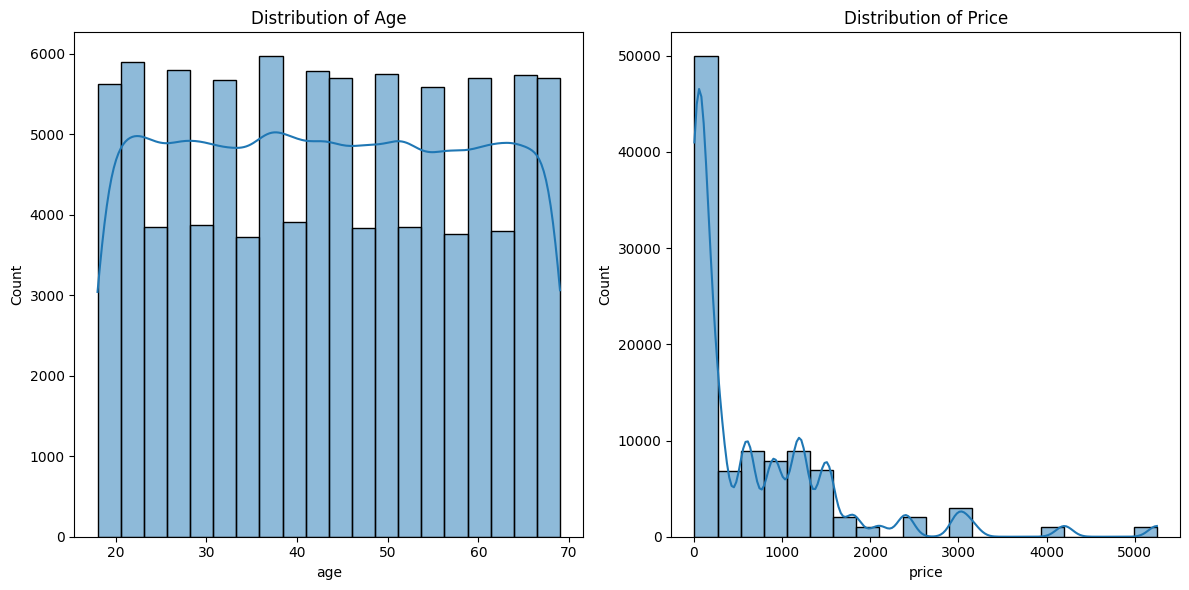

In [40]:
# Visualize the distribution of numerical variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 2, 2)
sns.histplot(df['price'], bins=20, kde=True)
plt.title('Distribution of Price')
plt.tight_layout()
plt.show()

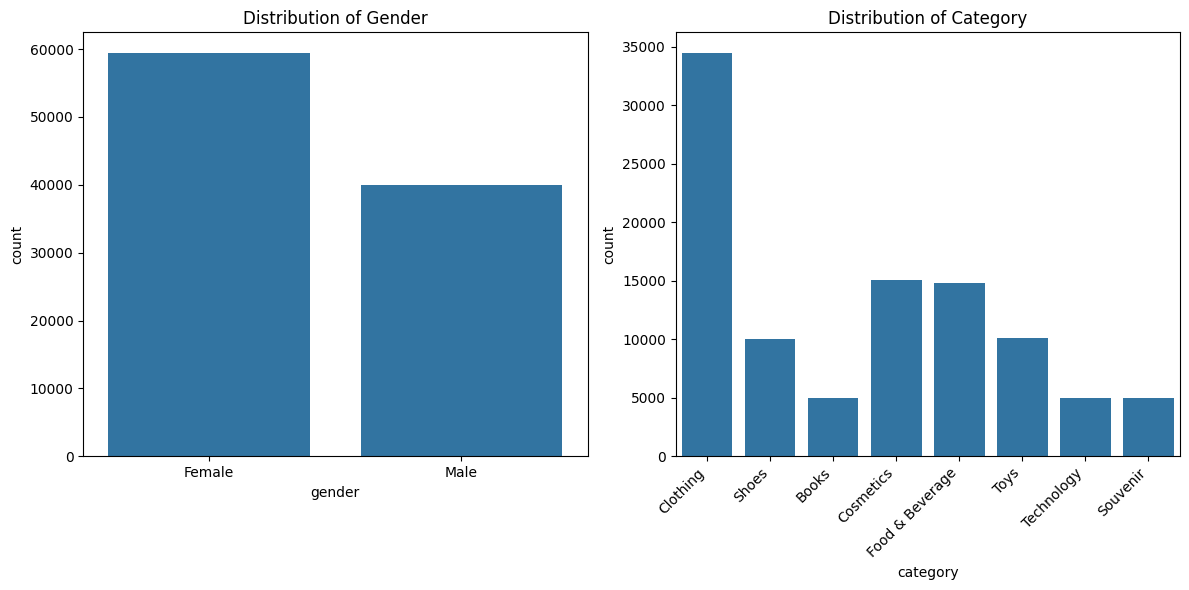

In [41]:
# Visualize the distribution of categorical variables
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='gender', data=df)
plt.title('Distribution of Gender')

plt.subplot(1, 2, 2)
sns.countplot(x='category', data=df)
plt.title('Distribution of Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

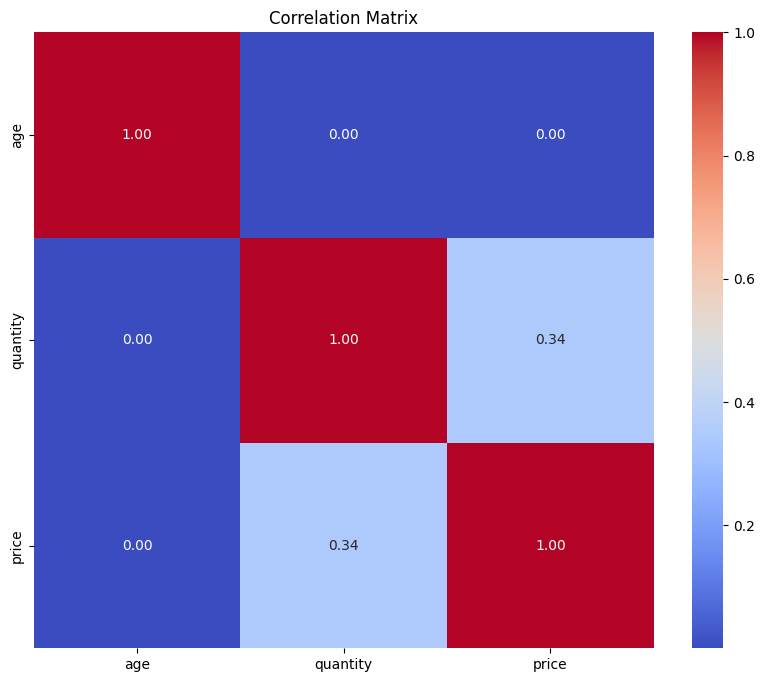

In [43]:
# Select numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix for numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


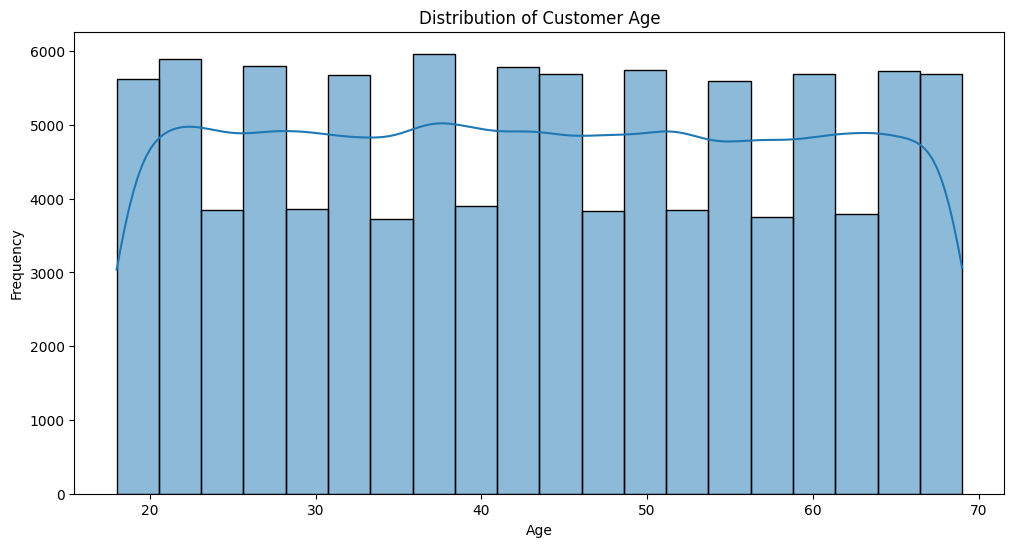

In [49]:
# Investigate trends in customer purchasing behavior based on age
plt.figure(figsize=(12, 6))
sns.histplot(x='age', data=df, bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

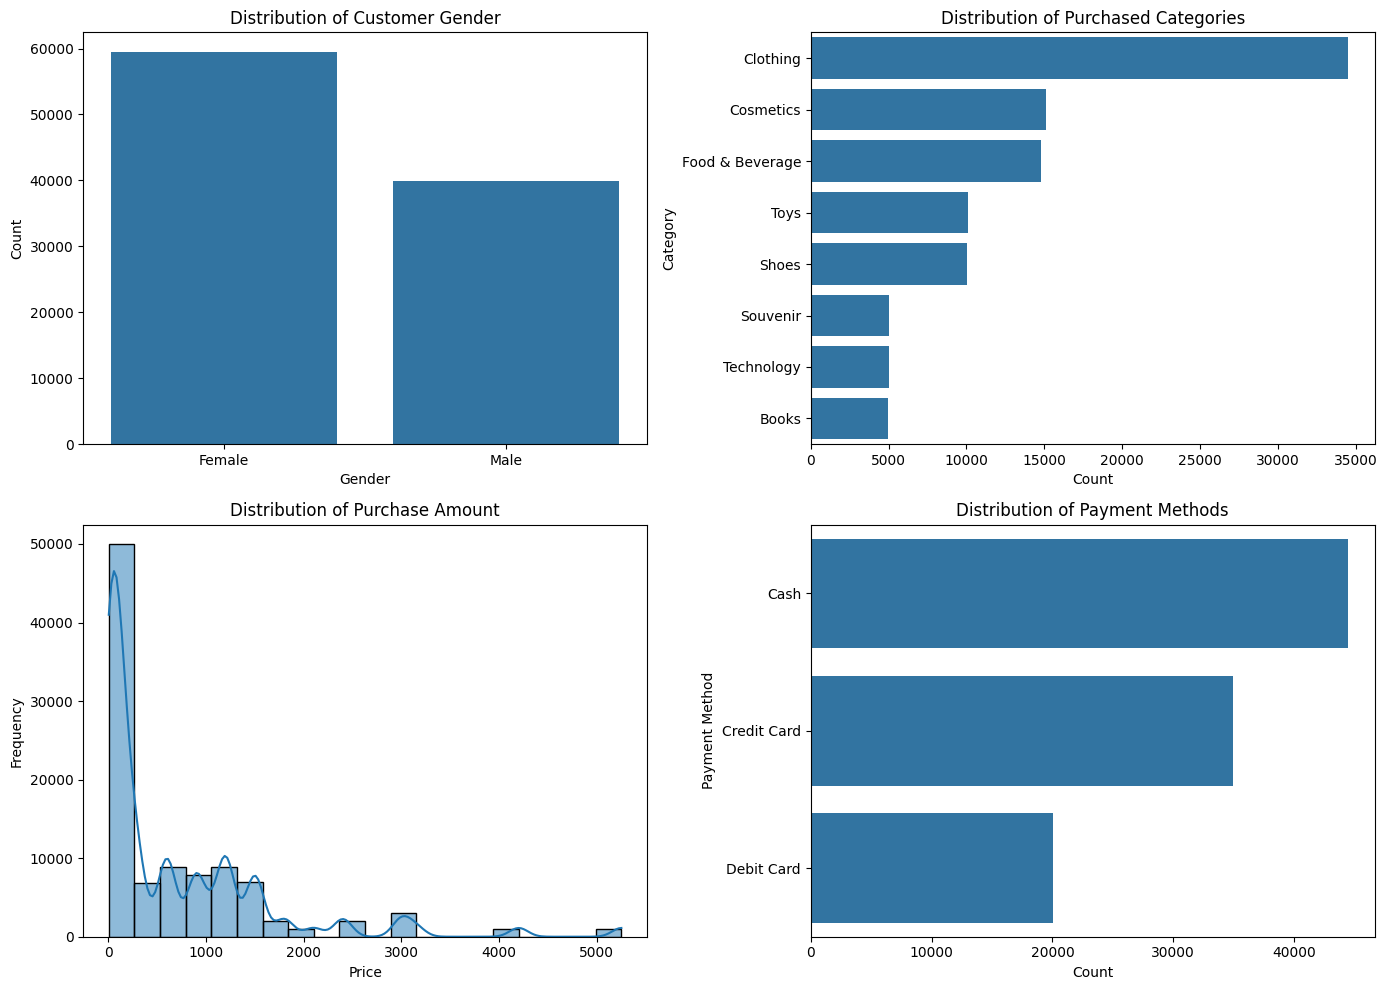

In [55]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Gender distribution
sns.countplot(x='gender', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Customer Gender')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')

# Category distribution
sns.countplot(y='category', data=df, order=df['category'].value_counts().index, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Purchased Categories')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Category')

# Purchase amount distribution
sns.histplot(df['price'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Purchase Amount')
axes[1, 0].set_xlabel('Price')
axes[1, 0].set_ylabel('Frequency')

# Payment method distribution
sns.countplot(y='payment_method', data=df, order=df['payment_method'].value_counts().index, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Payment Methods')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Payment Method')

plt.tight_layout()
plt.show()

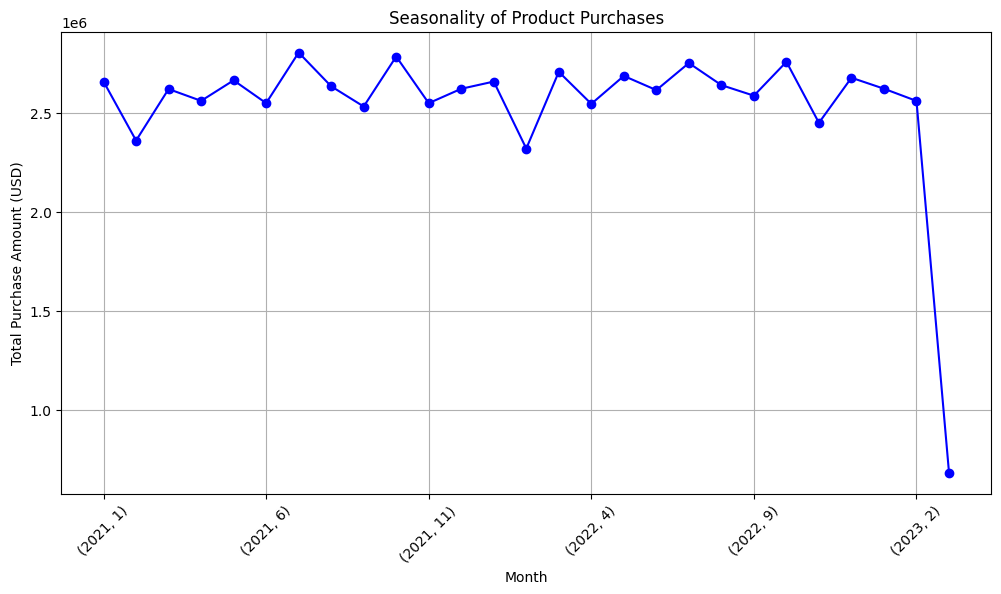

In [58]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

# Extract month and year from 'invoice_date'
df['month'] = df['invoice_date'].dt.month
df['year'] = df['invoice_date'].dt.year

# Group by month and calculate total purchase amount
monthly_purchase = df.groupby(['year', 'month'])['price'].sum()

# Plot the seasonality of product purchases
plt.figure(figsize=(12, 6))
monthly_purchase.plot(kind='line', marker='o', color='b')
plt.title('Seasonality of Product Purchases')
plt.xlabel('Month')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()